In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


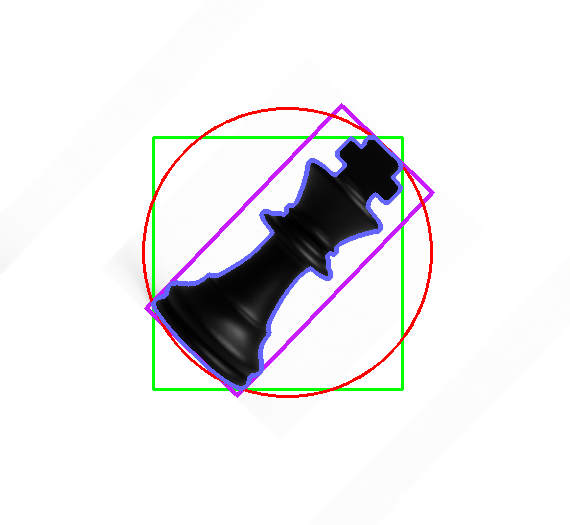

In [3]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

img_path = '/content/drive/My Drive/img2.png'

img = cv2.imread(img_path)
img = cv2.GaussianBlur(img, (5,5) , 0)

ret, thresh = cv2.threshold(cv2.cvtColor(img.copy(),cv2.COLOR_BGR2GRAY),
     127 , 255, cv2.THRESH_BINARY_INV )

contours, hier = cv2.findContours(thresh,
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
        # find bounding box coordinates
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)

        # ّFind min Area
        rect = cv2.minAreaRect(c)
        box = cv2.boxPoints(rect)
        box = np.intp(box)
        cv2.drawContours(img , [box],0 , (255,27,200) , 3)

        #ّ Calculate Center and radius of min enclosing circle
        (x,y),radius = cv2.minEnclosingCircle(c)
        center = (int(x),int(y))
        radius = int(radius)
        cv2.circle(img,center,radius,(0,0,255),2)
cv2.drawContours(img, contours, -1, (255, 100, 100), 4)
cv2_imshow(img)
